# IMPORTS

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
import numpy as np 



Nesta secção do notebook, exploraremos várias técnicas de análise não supervisionadas para obter insights sobre as relações entre os recursos no nosso dataset. Começaremos pela  correlação entre os recursos usando um gráfico  de correlação. A seguir, iremos utilizar a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados e identificar as características mais importantes. Posteriormente, utilizaremos o t-SNE para visualizar os dados de alta dimensão em um espaço bidimensional. Por fim, o algoritmo de agrupamento K-Means para agrupar pontos de dados semelhantes e identificar quaisquer padrões subjacentes nos dados.

In [5]:
path = r"C:\Users\Fofinha\Desktop\UNI\MESTRADO\2o ANO\Sistemas Inteligentes\Work_SIB\Work-SIB\dataset.csv"
data=pd.read_csv(path)

In [6]:
data

,Y,Parametro 0,Parametro 1,Parametro 2,Parametro 3,Parametro 4,Parametro 5,Parametro 6,Parametro 7,Parametro 8,...,MACCSKey drug2 150,MACCSKey drug2 151,MACCSKey drug2 152,MACCSKey drug2 153,MACCSKey drug2 154,MACCSKey drug2 155,MACCSKey drug2 157,MACCSKey drug2 159,MACCSKey drug2 160,MACCSKey drug2 162
0,7.693530,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,7.778053,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,-1.198505,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,2.595684,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,-5.139971,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,10.223066,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19586,20.551627,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19587,12.190316,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19588,23.438547,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


O nosso objetivo será identificar as colunas cujo nome não é parametro e analisar a correlação entre um subgrupo das mesmas e a variavel Y.

Para a escolha desse subgrupo iremos selecionar as que tem maior variancia top 10.

A seleção de colunas com maior variância é uma boa prática pois passa o foco em características relevantes, reduz a dimensionalidade dos dados que permite uma melhor eficiência computacional, e também a prevenir overfitting, pois características com baixa variância têm maior probabilidade de se ajustarem aos dados de treino.

In [7]:

colunas_sem_parametro = [coluna for coluna in data.columns if 'parametro' not in coluna.lower()]

numero_colunas_sem_parametro = len(colunas_sem_parametro)

print("Colunas sem o nome 'parametro':", colunas_sem_parametro)
print("Número de colunas sem o nome 'parametro':", numero_colunas_sem_parametro)


Colunas sem o nome 'parametro': ['Y', 'drug1 MolWt', 'drug1 HeavyAtomMolWt', 'drug1 ExactMolWt', 'drug1 NumValenceElectrons', 'drug1 BCUT2D_MWHI', 'drug1 BertzCT', 'drug1 LabuteASA', 'drug1 PEOE_VSA7', 'drug1 SMR_VSA5', 'drug1 SMR_VSA7', 'drug1 SlogP_VSA2', 'drug1 SlogP_VSA5', 'drug1 TPSA', 'drug1 EState_VSA1', 'drug1 VSA_EState1', 'morgan drug1 0', 'morgan drug1 1', 'morgan drug1 4', 'morgan drug1 7', 'morgan drug1 8', 'morgan drug1 9', 'morgan drug1 11', 'morgan drug1 12', 'morgan drug1 14', 'morgan drug1 15', 'morgan drug1 20', 'morgan drug1 23', 'morgan drug1 25', 'morgan drug1 33', 'morgan drug1 34', 'morgan drug1 36', 'morgan drug1 42', 'morgan drug1 51', 'morgan drug1 53', 'morgan drug1 54', 'morgan drug1 61', 'morgan drug1 64', 'morgan drug1 65', 'morgan drug1 67', 'morgan drug1 71', 'morgan drug1 72', 'morgan drug1 73', 'morgan drug1 74', 'morgan drug1 75', 'morgan drug1 77', 'morgan drug1 78', 'morgan drug1 80', 'morgan drug1 90', 'morgan drug1 96', 'morgan drug1 102', 'morga

In [8]:
subdataset = data[colunas_sem_parametro]

# Exibir informações sobre o novo DataFrame
print("Shape do subdataset:", subdataset.shape)

Shape do subdataset: (19590, 930)


In [9]:
variancia_por_coluna = subdataset.var()

# Classificar as colunas com base na variância em ordem decrescente
colunas_top10_variancia = variancia_por_coluna.sort_values(ascending=False).head(10)

# Exibir informações sobre as top 10 colunas com maior variância
print("Top 10 colunas com maior variância:")
print(colunas_top10_variancia)

Top 10 colunas com maior variância:
Y                       333.588299
drug1 BertzCT             2.655616
drug2 BertzCT             1.099367
drug1 TPSA                0.742809
drug1 MolWt               0.661212
drug1 ExactMolWt          0.656456
drug1 HeavyAtomMolWt      0.548409
drug2 MolWt               0.508516
drug2 ExactMolWt          0.507616
drug2 HeavyAtomMolWt      0.434178
dtype: float64


De seguida mostramos os gráficos de normalização das colunas top_10 de variância.

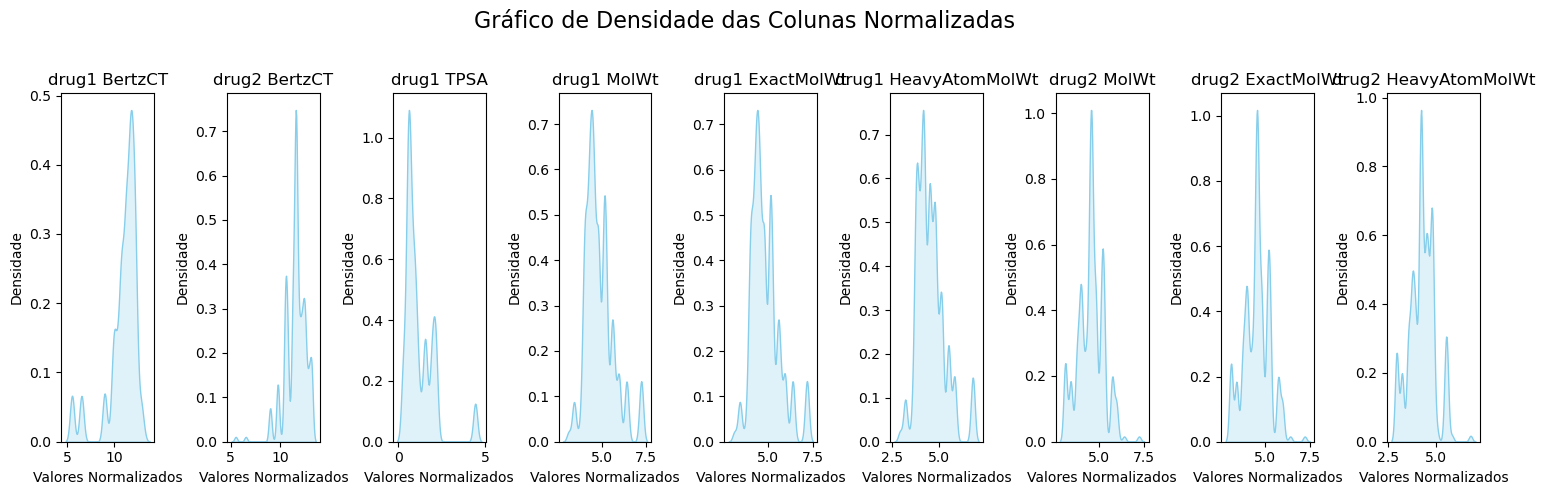

In [21]:
df_normalized = subdataset[colunas_top10_variancia[1:].index]

columns_normalized = df_normalized.columns

fig, axes = plt.subplots(1, len(columns_normalized), figsize=(15, 5))
fig.suptitle('Gráfico de Densidade das Colunas Normalizadas', fontsize=16)

for i, col in enumerate(columns_normalized):
    sns.kdeplot(df_normalized[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valores Normalizados')
    axes[i].set_ylabel('Densidade')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

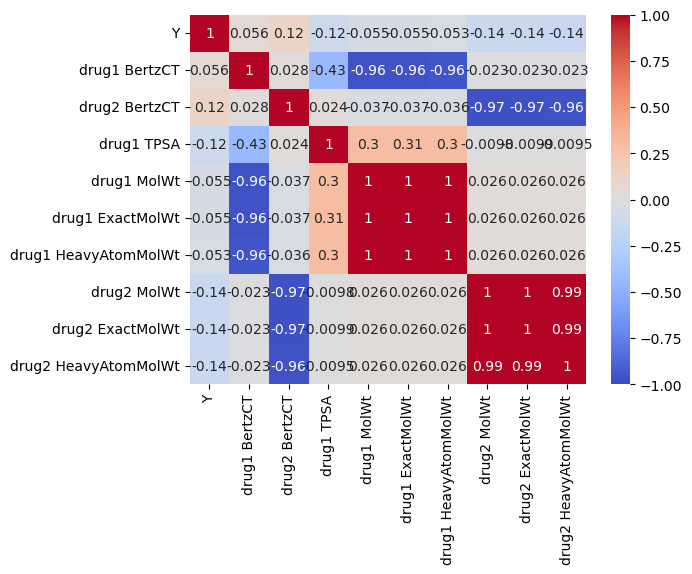

In [10]:
subdataset_top10_variancia = data[colunas_top10_variancia.index]
features_corr=subdataset_top10_variancia.corr()
sns.heatmap(features_corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

# plot
plt.show()

Os resultado do heat_map de correlações paresentam uma clara correlação positiva entre as features de HeavyAtomMolWt, MolWt e ExactMolWT, com valores muito proximos de 1 . Como estas features estão todas realacionadas com o peso molecular, seria algo expectável de se verificar.

Em relação à variavel independente não se observa nenhuma correlação positiva criada, mas certamente iremos explorar mais este assunto quando exploramos os modelos de ML e featues que maior peso têm nesses modelos

# Redução de dimensionalidade

__PCA__

Após a seleção das features, procedeu-se à redução de dimensionalidade do dataframe resultante ("data"), de modo a obter um conjunto menor e independente de variáveis chamadas de componentes principais.
O PCA foi realizado para uma redução de até três PCs que explicam 85% da variância dos dados. Os dados obtidos podem ser visualizados no gráfico bidimensional que utiliza os dois componentes principais como eixo.



In [11]:
data

,Y,Parametro 0,Parametro 1,Parametro 2,Parametro 3,Parametro 4,Parametro 5,Parametro 6,Parametro 7,Parametro 8,...,MACCSKey drug2 150,MACCSKey drug2 151,MACCSKey drug2 152,MACCSKey drug2 153,MACCSKey drug2 154,MACCSKey drug2 155,MACCSKey drug2 157,MACCSKey drug2 159,MACCSKey drug2 160,MACCSKey drug2 162
0,7.693530,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
1,7.778053,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,-1.198505,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,2.595684,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,-5.139971,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,10.223066,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19586,20.551627,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19587,12.190316,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19588,23.438547,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
dados_sem_Y=data.drop("Y",axis=1)

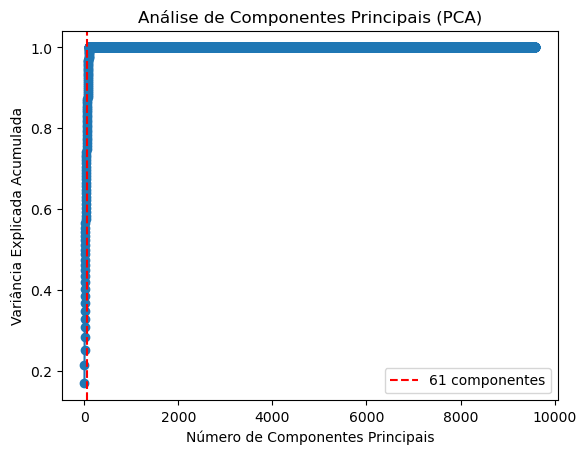

Número de componentes necessários para 85% da variância explicada: 61


In [13]:
pca = PCA()

# Aplicar PCA ao subdataset
pca_resultados = pca.fit_transform(dados_sem_Y)

# Calcular a porcentagem acumulada da variância explicada por cada componente
variabilidade_explicada = pca.explained_variance_ratio_.cumsum()

# Determinar o número de componentes necessários para explicar 85% da variância
numero_componentes_85_variancia = (variabilidade_explicada >= 0.85).argmax() + 1

# Visualizar a variabilidade explicada por cada componente
plt.plot(range(1, len(variabilidade_explicada) + 1), variabilidade_explicada, marker='o')
plt.axvline(x=numero_componentes_85_variancia, color='r', linestyle='--', label=f'{numero_componentes_85_variancia} componentes')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Análise de Componentes Principais (PCA)')
plt.legend()
plt.show()

# Exibir o número de componentes necessários
print(f"Número de componentes necessários para 85% da variância explicada: {numero_componentes_85_variancia}")

In [14]:
pca = PCA(n_components=60)
pca.fit(dados_sem_Y)

# determinar var
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print('Var. explicada: %s'% str(pca.explained_variance_ratio_))
print('Soma:', sum(pca.explained_variance_ratio_) * 100, '%')


Var. explicada: [0.16877471 0.04552142 0.03777878 0.03271889 0.0225403  0.02093927
 0.02019515 0.01939228 0.01756832 0.01738544 0.01660304 0.0149185
 0.01409737 0.01365314 0.01311647 0.01269728 0.0118766  0.01149716
 0.01111387 0.01079981 0.01058277 0.01048193 0.01020411 0.0099021
 0.00979534 0.00972394 0.00930381 0.00918288 0.00910882 0.00909429
 0.00888766 0.00873573 0.00865052 0.00829737 0.00817214 0.00813071
 0.00808809 0.00793715 0.00777208 0.00773908 0.00754155 0.00733829
 0.00720856 0.00714725 0.00705005 0.00699567 0.00688139 0.00678849
 0.00675998 0.0067117  0.00660008 0.00640486 0.00633873 0.00622289
 0.00608922 0.00599021 0.00595434 0.00589722 0.00572067 0.0056607 ]
Soma: 84.42801700165674 %


Decidimos ficar com 60 PC , que representam aproximadamente 85 % da variância dos dados.

Os dados obtidos podem ser visualizados no gráfico bidimensional que utiliza os dois componentes principais como eixo.

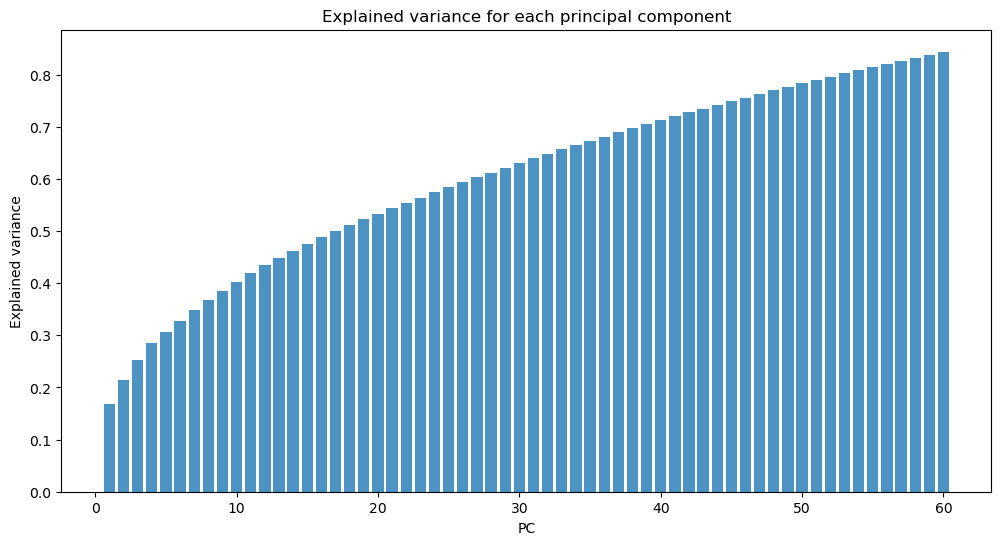

In [15]:
import numpy as np
componentes = np.arange(1, 61)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(componentes, cumulative_variance_ratio, alpha=0.8, align='center')
plt.xlabel('PC')
plt.ylabel('Explained variance')
plt.title('Explained variance for each principal component')
plt.show()

In [16]:
dados_sem_Y["Y_bin"] = np.where((data['Y'] >= -10) & (data['Y'] <= 10), 0,np.where(data['Y'] > 10, 1, -1))
dados_sem_Y

,Parametro 0,Parametro 1,Parametro 2,Parametro 3,Parametro 4,Parametro 5,Parametro 6,Parametro 7,Parametro 8,Parametro 9,...,MACCSKey drug2 151,MACCSKey drug2 152,MACCSKey drug2 153,MACCSKey drug2 154,MACCSKey drug2 155,MACCSKey drug2 157,MACCSKey drug2 159,MACCSKey drug2 160,MACCSKey drug2 162,Y_bin
0,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
1,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
2,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
3,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
4,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
19586,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
19587,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
19588,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


Decidimos verificar a representação gráfica , tendo em conta as 3 PC. Para isso acrecentamos ao dataset a coluna y_bin onde os valores de y maiores que 10 teriam valor 1, menor que -10 valor -1 e entre -10 e 10 valor 0.

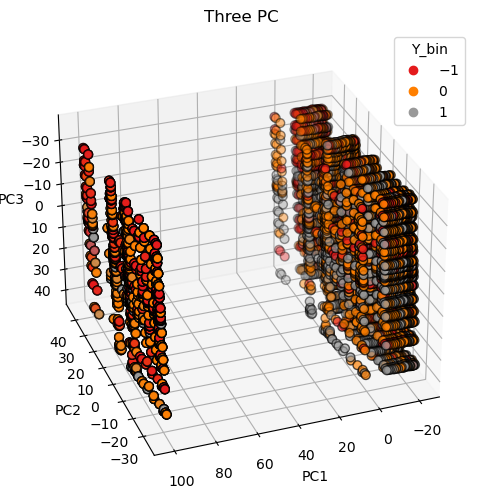

In [17]:
pca = PCA(n_components=60)
pca.fit(dados_sem_Y)
pca_scores = pca.transform(dados_sem_Y)[:, :3]

# Criar um gráfico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# Scatter plot com PC1, PC2 e PC3, colorido pela variável binarizada Y
scatter = ax.scatter(
    pca_scores[:, 0],
    pca_scores[:, 1],
    pca_scores[:, 2],
    c=dados_sem_Y['Y_bin'],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

# Adicionar rótulos aos eixos
ax.set_title("Three PC")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

# Adicionar uma legenda para os valores binarizados
legend = ax.legend(*scatter.legend_elements(), title="Y_bin")

No gráfico PCA em 3 dimensoes, podemos observar que não há uma clara separação , indicando que a partir dos dados inseridos, não existem diferenças claras que permitam distinguir os compostos. Desta forma uma solução seria a representar num gráfico de maior dimensionalidade , mas ficaria dificil para a perceção humana a interpretação.



Cada linha na matriz pca.components_ representa um componente principal, e cada coluna representa uma feature. O valor em cada posição representa o peso da feature no componente principal correspondente.

Para ter uma ideia de quais serão features mais associadas a cada PC, examinaram-se os valores dos pesos das features em cada linha. As features com os valores absolutos mais altos numa determinada linha são aquelas que contribuem mais para esse componente principal.

In [18]:
# nomes das features
feature_names = list(dados_sem_Y.columns.values)


for i, pc in enumerate(pca.components_):
    print(f"Principal component {i+1}:")
    
    # obter pesos das features
    pc_weights = dict(zip(feature_names, pc))
    
    # ordenar features pelo peso
    pc_weights_sorted = sorted(pc_weights.items(), key=lambda x: abs(x[1]), reverse=True)
    
    # top 5 features
    for j in range(20):
        feature, weight = pc_weights_sorted[j]
        print(f"\t{feature}: {weight:.3f}")
    
    print()

Principal component 1:
	Parametro 5871: 0.026
	Parametro 6296: 0.026
	Parametro 5958: 0.026
	Parametro 5503: 0.026
	Parametro 6591: 0.026
	Parametro 8709: 0.026
	Parametro 6203: 0.026
	Parametro 7690: 0.026
	Parametro 6461: 0.026
	Parametro 8409: 0.026
	Parametro 6326: 0.026
	Parametro 8656: 0.026
	Parametro 6677: 0.026
	Parametro 7845: 0.026
	Parametro 7591: -0.026
	Parametro 5415: 0.026
	Parametro 6086: 0.026
	Parametro 7600: -0.026
	Parametro 5587: 0.026
	Parametro 7541: 0.026

Principal component 2:
	Parametro 1941: 0.049
	Parametro 2394: 0.049
	Parametro 2393: 0.049
	Parametro 1902: 0.048
	Parametro 1705: 0.048
	Parametro 2380: 0.048
	Parametro 1635: 0.048
	Parametro 2235: 0.048
	Parametro 2325: 0.048
	Parametro 1783: 0.048
	Parametro 2399: 0.048
	Parametro 1887: 0.048
	Parametro 1708: 0.048
	Parametro 1791: 0.048
	Parametro 2193: 0.048
	Parametro 1911: 0.048
	Parametro 1878: 0.048
	Parametro 7: 0.048
	Parametro 1870: 0.048
	Parametro 1755: 0.048

Principal component 3:
	Parametro

In [19]:
dados_tsne=dados_sem_Y
dados_tsne

,Parametro 0,Parametro 1,Parametro 2,Parametro 3,Parametro 4,Parametro 5,Parametro 6,Parametro 7,Parametro 8,Parametro 9,...,MACCSKey drug2 151,MACCSKey drug2 152,MACCSKey drug2 153,MACCSKey drug2 154,MACCSKey drug2 155,MACCSKey drug2 157,MACCSKey drug2 159,MACCSKey drug2 160,MACCSKey drug2 162,Y_bin
0,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
1,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
2,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
3,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
4,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
19586,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
19587,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
19588,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


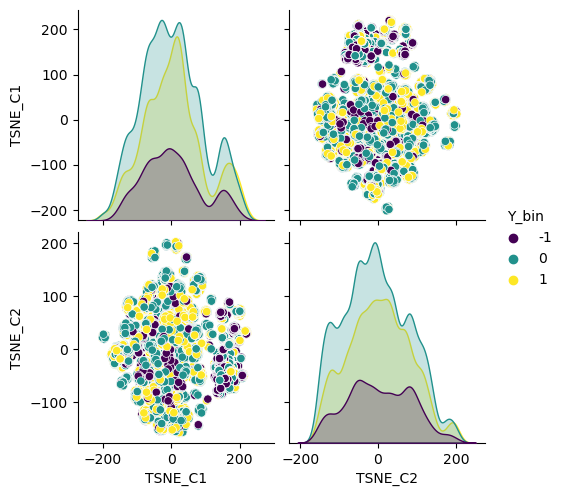

In [20]:
model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_drugs = model.fit_transform(dados_tsne)
dados_tsne['TSNE_C1'] = tsne_drugs.T[0]
dados_tsne['TSNE_C2'] = tsne_drugs.T[1]
sns.pairplot(dados_tsne, hue='Y_bin', vars=['TSNE_C1', 'TSNE_C2'], palette='viridis')


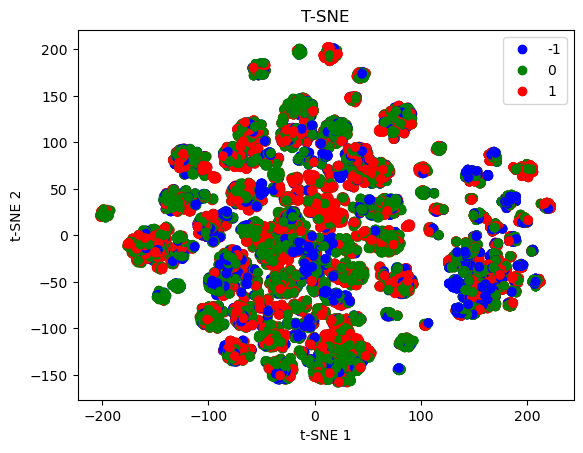

In [22]:
class_tm_colors = {-1:'blue', 0:'green', 1:'red'}
class_colors = []

for classification in dados_tsne['Y_bin']:
    class_colors.append(class_tm_colors[classification])

plt.scatter(dados_tsne['TSNE_C1'], dados_tsne['TSNE_C2'], c=class_colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('T-SNE')
handles = [plt.plot([], marker="o", ls="", color=class_tm_colors[c], label=c)[0] for c in class_tm_colors]
plt.legend(handles=handles)
plt.show()

A partir da visualização do gráfico do TSNE não é possível verificar nenhum clusters relevante, pelo que não conseguimos tirar conclusões.  

# Clustering

Como estamos perante um problema de regressão (em que a variável alvo é contínua e você está tentando prever um valor numérico), o clustering hierárquico pode não ser a abordagem mais apropriada. O clustering hierárquico é mais adequado para problemas de classificação, onde  existemtem categorias ou grupos discretos a identificar.Desta forma decidimos seguir com a mesma estratégia onde dividimos o nosso dataset em -1,0,1 consonate o valor do y é inferior a -10, entre -10 e 10 , superior a 10, respetivamente.

In [23]:
dados_clustering=dados_tsne
dados_clustering=dados_tsne.iloc[:,:-2]

In [24]:
dados_clustering

,Parametro 0,Parametro 1,Parametro 2,Parametro 3,Parametro 4,Parametro 5,Parametro 6,Parametro 7,Parametro 8,Parametro 9,...,MACCSKey drug2 151,MACCSKey drug2 152,MACCSKey drug2 153,MACCSKey drug2 154,MACCSKey drug2 155,MACCSKey drug2 157,MACCSKey drug2 159,MACCSKey drug2 160,MACCSKey drug2 162,Y_bin
0,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
1,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
2,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
3,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
4,5.291146,5.040387,5.291146,0.908336,2.514969,5.291146,5.291146,-1.492008,1.143195,-0.891875,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
19586,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
19587,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
19588,-0.188995,-0.198397,-0.188995,1.494725,-0.397619,-0.188995,-0.188995,-0.925171,-0.674146,-0.891875,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


Como o dataset é gigantesco , optamos por escolher de uma forma random 100 linhas do mesmo e executar clustering de apenas essas 100 linhas. Até porque em termos de recursos computaacionais nao nos ser permitido analisar od ataset todo, muito provavelmente tamb+em não iriamos conseguir tirar nenhuma conclusão dada a elevada dimensão.

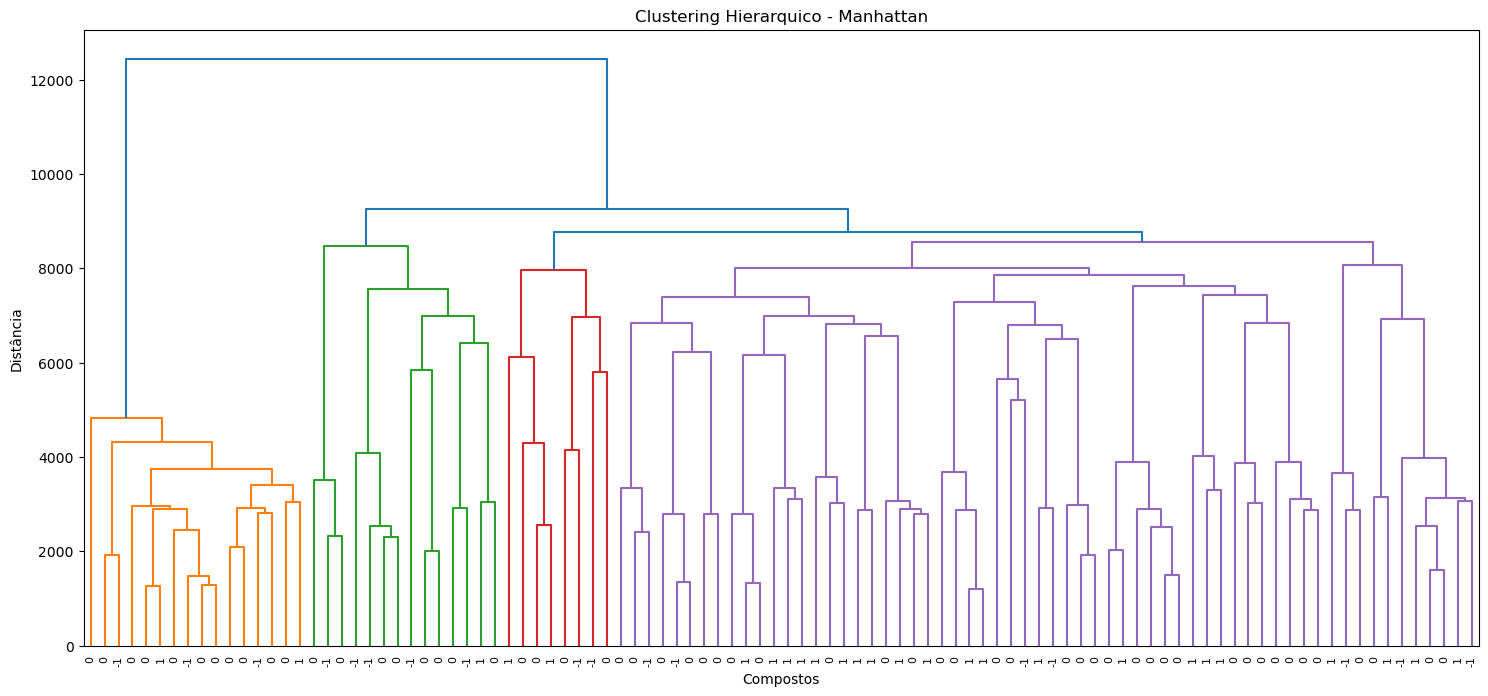

In [25]:
sampled_data = dados_clustering.sample(n=100, random_state=42)

# Clustering hierarquico com distância de manhattan
Z = linkage(sampled_data, method='complete', metric='cityblock')

# dendograma
plt.figure(figsize=(18, 8))
dendrogram(Z, 
           labels=sampled_data['Y_bin'].values, 
           orientation='top', 
           leaf_font_size=8)

# mapa de cores
data_colors = {-1:"red",0: 'blue', 1: 'green'}
ax = plt.gca()


plt.title('Clustering Hierarquico - Manhattan')
plt.xlabel('Compostos')
plt.ylabel('Distância')
plt.show()

Pela interpretação conseguimos verificar que os dados foram agruapados em clusters mas a separação dos valores -1,1,0 é muito pouca, existindo por exemplo no cluster a roxo valores de -1,1 e 0 o que não seria pretendido. 

# K-means

c:\Users\Fofinha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fofinha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Fofinha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Fofinha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

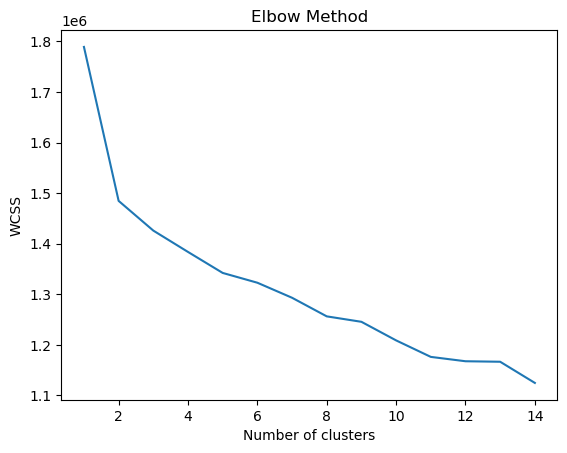

In [26]:
sampled_data = dados_clustering.sample(n=200, random_state=42)

wcss = list()
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(sampled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Após selecionar algumas características relevantes podemos verificar que os dados possuem baixa linearidade. Para verificar ainda mais a estrutura dos dados, realizamos PCA para reduzir a dimensionalidade dos dados. Com um numero de 60 PC conseguimos explicar 85 % da variância total. Tentamos então uma técnica t-SNE, mais apropriada para dados não lineares, mas ao ter um problema de regressao optamos pela estrategia de classificar a nossa coluna y , tendo em conta que valores <= -10 fica -1, valores >=10 fica 1 e entre ambos fica 0.  Também plotamos os pontos dos dados do t-SNE de acordo com a classificação de referida(-1,0,1) para verificar se havia alguma relação, porém nenhum padrão foi encontrado. Decidimos concluir que clustering tendo em conta o nosso dataset , e mesmo fazendo o esforço para diminuir o mesmo não se enquadra nos melhor métodos para interpretar os dados obtidos. Desta forma, mesmo obtendo algo quando diminuimos a dimensao do dataset e utilizamos a estratégia de agrupar os valores continuos da coluna Y, em -1,1 ou 0 (coluna y_bin) achamos erróneo tirar algum tipo de conclusão pois em nada irá ajudar na interpretação do nosso dataset.